# Задание (Вариант 8)



In [18]:
def qZ(x, y):
    return (x - 3*y - 3) / (x ** 2 + 2*y**2 + 1)

In [19]:
def qSumZ(Z):
    return sum (Z)

In [20]:
def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]

    X[0] = oldX[sortedId[0]]

    X[1] = oldX[sortedId[1]]

    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]

    Y[2] = oldY[sortedId[0]]

    Y[3] = oldY[sortedId[1]]

    return X, Y

In [21]:
def sorting(Z):
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])
    
    return sortedId 

In [22]:
def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X. pop(minId)
    Y. pop(minId)
    Z. pop(minId)

    return X, Y, Z

In [23]:
def evoSteps(X, Y, stepsNum = 4):
    results = []

    for i in range(4):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]

        X, Y, Z = evoStep(X, Y, arrZ)

        X, Y = exchangeScheme(X, Y, sorting(Z))

        results.append([X, Y, qSumZ(arrZ), arrZ])

    return X, Y, results

In [24]:
X = [-5, -3, -2, -1]
Y = [-1, -2, -0, 1]

In [25]:
results = evoSteps(X, Y)

In [26]:
for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]

print(f'max Z:       {max(qualityArrZ)}')

max_1_step: -2.928571428571429
max_2_step: -0.8319004524886877
max_3_step: -0.2676147382029735
max_4_step: 0.09502262443438915
max Z:       0.07692307692307693


# Задание (Вариант 2)

In [27]:
import networkx as nx
from math import e

In [28]:
distances = [(1, 2, 25),
            (1, 3, 41),
            (1, 4, 38),
            (1, 5, 27),
            (1, 6, 20),
            (2, 3, 21),
            (2, 4, 34),
            (2, 5, 39),
            (2, 6, 17),
            (3, 4, 24),
            (3, 5, 40),
            (3, 6, 22),
            (4, 5, 21),
            (4, 6, 11),
            (5, 6, 22)] # длины рёбер

V = [1, 3, 5, 4, 6, 2, 1] # последовательность прохождения маршрута
Z = [(3, 4),
     (4, 6),
     (5, 6),
     (2, 4)] # последовательность замен вершин
P = [41, 60, 85, 60] # случайные числа, выпавшие в процессе счёта

T = 100 # начальная температура

In [29]:
def probability(delta, T):
    return 100 * e ** (-delta / T)

# функция изменения температуры
def reductTemp(prevT):
    nextT = 0.5 * prevT

    return nextT

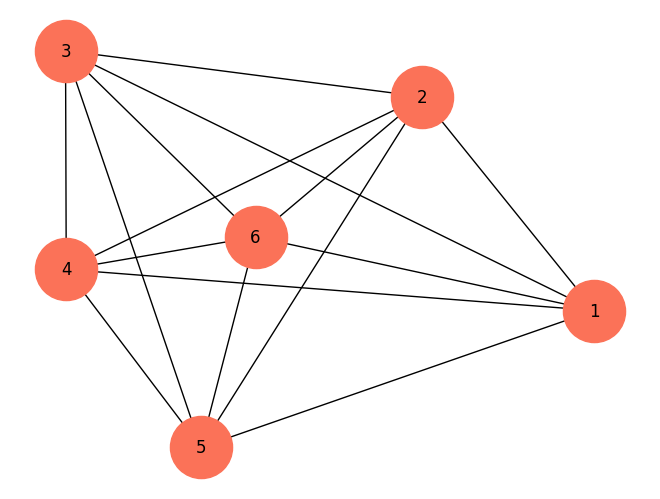

In [30]:
graph = nx.Graph() # создание пустого графа
graph.add_weighted_edges_from(distances) # добавление весов рёбер

# отрисовка графа с заданными вершинами
nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

In [31]:
def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
            for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

In [32]:
def routeLength(V, distances):
    edges = []

    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))

        return sum(edges)

In [33]:
def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV

In [34]:
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

In [35]:
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # нахождение длины пути
    arrSum = [sumLength] # массив сумм длин

    # циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки
        newS = routeLength(newV, distances) # длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength # разница между длиной нового и старого маршрутов

        # в случае, если разница между длинами больше 0, то вычисляется вероятность
        if deltaS > 0:
            p = probability(deltaS, T) # подсчёт вероятности

            # если заданная вероятность попадает в интервал от 0 до р, то новый маршрут выбирается
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS

        T = reductTemp(T) # вычисление температуры

    return V, arrSum

In [36]:
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)

    graph = nx.Graph() # создание пустого графа

    graph.add_weighted_edges_from(newDistances) # добавление весов рёбер
# отрисовка графа с заданными вершинами
    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

Лучший выбранный маршрут: [1, 2, 4, 3, 5, 6, 1]
Длина лучшего выбранного маршрута: 25
Длины всех рассмотренных маршрутов: [41, 41, 41, 41, 25]


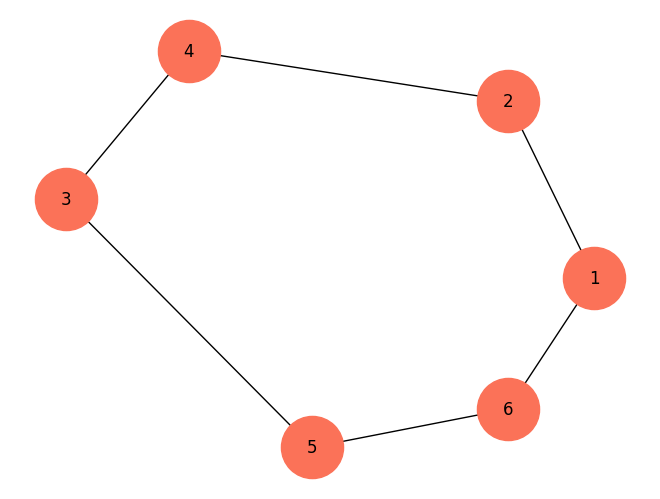

In [37]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) # отрисовка лучшего маршрута